In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Task 1 -  Distribution of dengue cases</h1>

count     1020.000000
mean      1124.926471
std       1662.608878
min         10.000000
25%        247.750000
50%        582.500000
75%       1284.250000
max      21658.000000
Name: Dengue_Cases, dtype: float64


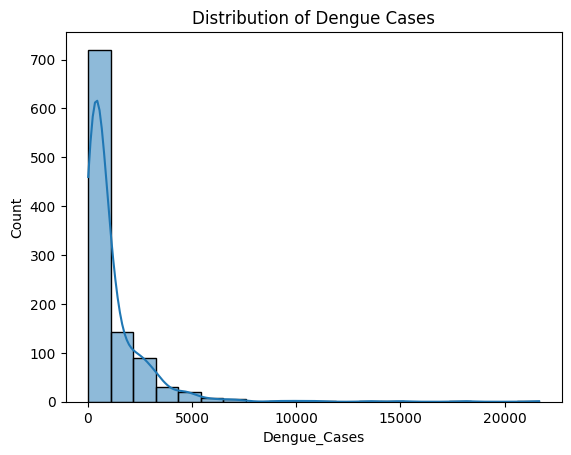

In [43]:
cases_distribution = dengue["Dengue_Cases"].describe()
print(cases_distribution)

sns.histplot(dengue["Dengue_Cases"], bins=20, kde=True)
plt.title("Distribution of Dengue Cases")
plt.show()


<h1>Insight: The histogram shows how dengue cases are distributed, highlighting the most common case counts.
</h1>

<h1>Task 2 - Average dengue deaths by region</h1>

Region
Region IV-B     2.166667
Region I        2.616667
Region V        3.083333
Region II       3.216667
BARMM           5.533333
Region XI       6.416667
Region III      8.033333
Region IX       8.866667
Region VIII     9.750000
Region IV-A    10.866667
Region X       14.133333
Region XIII    16.100000
CAR            16.800000
Region VII     29.333333
Region VI      30.416667
Region XII     46.600000
NCR            66.800000
Name: Dengue_Deaths, dtype: float64


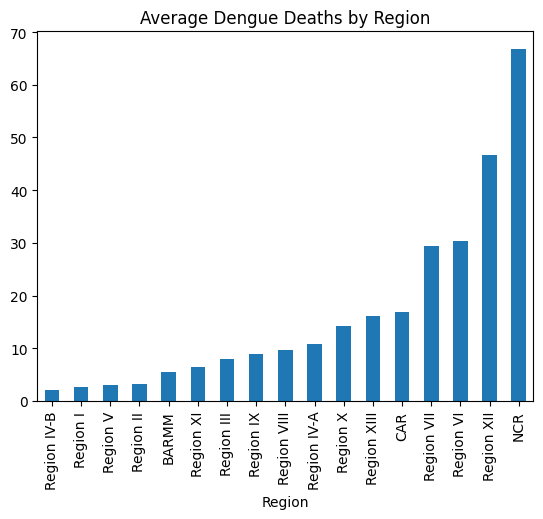

In [9]:
region_avg_deaths = dengue.groupby("Region")["Dengue_Deaths"].mean().sort_values()
print(region_avg_deaths)

region_avg_deaths.plot(kind='bar', title="Average Dengue Deaths by Region")
plt.show()


<h1> Insight: Some regions are more affected by dengue than others specially NCR, possibly due to climate and population density.</h1>

<h1>Task 3 - Dengue cases by month</h1>

Month
April         32508
August       187554
December      88431
February      77801
January       84328
July         138242
June          58110
March         57576
May           32387
November      94900
October      117645
September    177943
Name: Dengue_Cases, dtype: int64


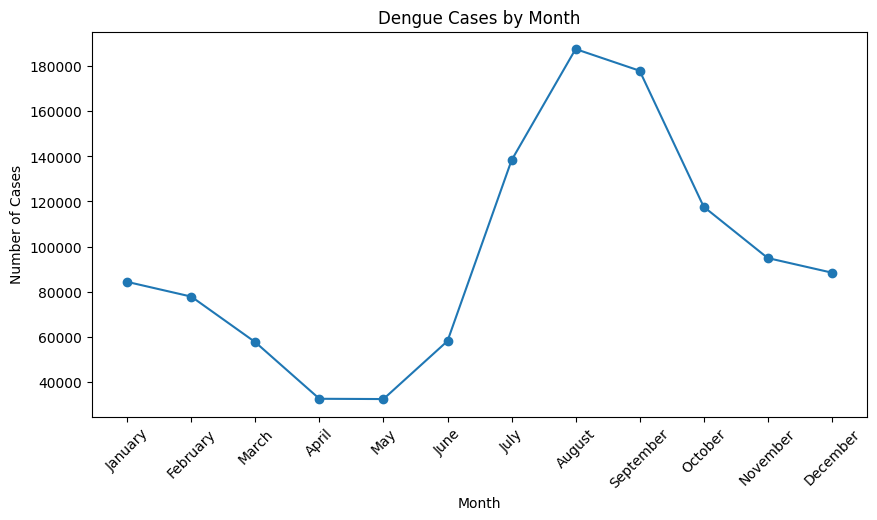

In [10]:
monthly_cases = dengue.groupby("Month")["Dengue_Cases"].sum()

print(monthly_cases)

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

monthly_cases = monthly_cases.reindex(months)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_cases.index, monthly_cases.values, marker='o')
plt.title("Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)  
plt.xticks(months)  

plt.show()

<h1> Insight: This helps identify seasonal trends, showing peak months for dengue outbreaks.
</h1>

<h1>Task 4 - Trend of dengue deaths over years</h1>

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


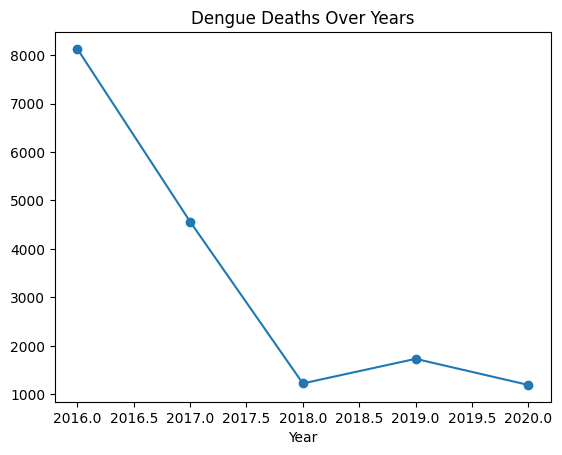

In [11]:
yearly_deaths = dengue.groupby("Year")["Dengue_Deaths"].sum()
print(yearly_deaths)

yearly_deaths.plot(kind='line', marker='o', title="Dengue Deaths Over Years")
plt.show()

<h1>Insight: Analyzing trends over years can show whether dengue control measures are effective.
</h1>

<h1>Task 5 -  Correlation between dengue cases and deaths</h1>

Correlation between Dengue Cases and Deaths: 0.03832213720419488


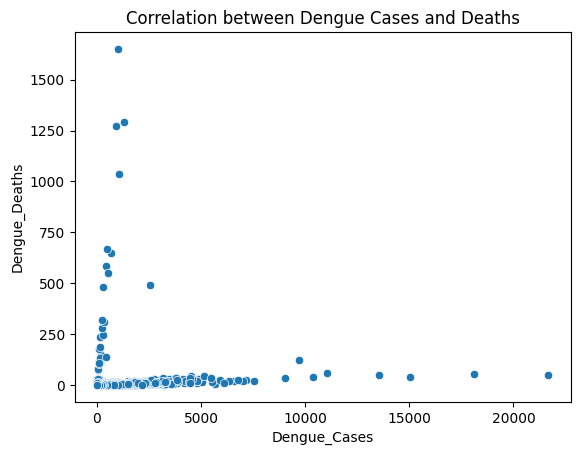

In [12]:
correlation = dengue["Dengue_Cases"].corr(dengue["Dengue_Deaths"])
print("Correlation between Dengue Cases and Deaths:", correlation)

sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"])
plt.title("Correlation between Dengue Cases and Deaths")
plt.show()

<h1> Insight:  Generally, an increase in dengue cases may lead to more deaths, but the correlation is weak, suggesting other factors also play a role.</h1>

<h1>Task 6 -  Dengue cases in first half vs second half of the year</h1>

First Half Cases: 342710 Second Half Cases: 804715


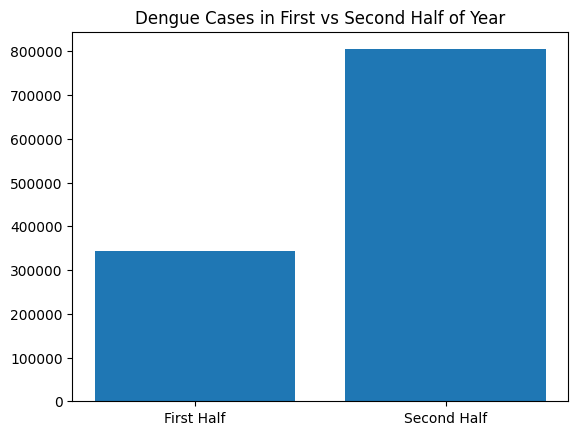

In [13]:
first_half_cases = dengue[dengue["Month"].isin(["January", "February", "March", "April", "May", "June"])]["Dengue_Cases"].sum()
second_half_cases = dengue[dengue["Month"].isin(["July", "August", "September", "October", "November", "December"])]["Dengue_Cases"].sum()
print("First Half Cases:", first_half_cases, "Second Half Cases:", second_half_cases)

plt.bar(["First Half", "Second Half"], [first_half_cases, second_half_cases])
plt.title("Dengue Cases in First vs Second Half of Year")
plt.show()

<h1>Insight: The second half of the year records more cases, possibly due to rainy seasons.
</h1>

<h1>Task 7 - Monthly dengue deaths distribution</h1>

Month
April         200
August        714
December      404
February      315
January       394
July          611
June          322
March         291
May           162
November      613
October      6670
September    6148
Name: Dengue_Deaths, dtype: int64


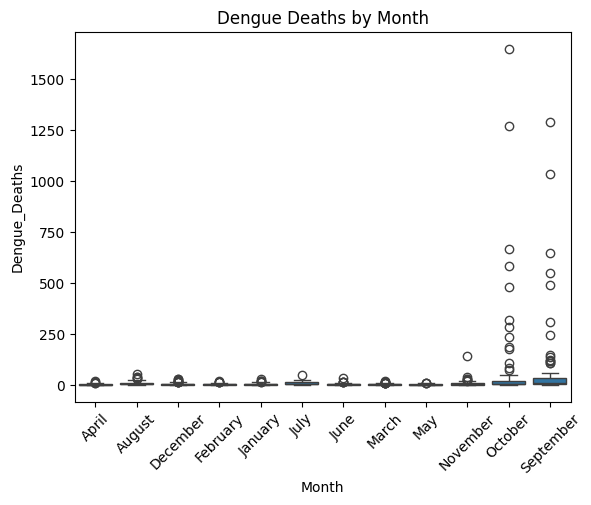

In [14]:
monthly_deaths = dengue.groupby("Month")["Dengue_Deaths"].sum()
print(monthly_deaths)

sns.boxplot(x=dengue["Month"], y=dengue["Dengue_Deaths"])
plt.title("Dengue Deaths by Month")
plt.xticks(rotation=45)
plt.show()

<h1>Insight: Certain months have significantly higher deaths, aligning with peak case months.</h1>

<h1>Task 8 - Dengue cases across regions and years</h1>

Region  BARMM   CAR    NCR  Region I  Region II  Region III  Region IV-A  \
Year                                                                       
2016     2191  9164  13002      8281       3891       20989        24282   
2017      485  4045  26103      8236       5310       25200        22421   
2018     2460  7584  29200     15511      17678       31726        30410   
2019     5393  8808  40478     19867      16634       37158        76195   
2020     1008   981   7183      7171       1628       15991         9721   

Region  Region IV-B  Region IX  Region V  Region VI  Region VII  Region VIII  \
Year                                                                           
2016           3999       7215      2532      26170       29395         5388   
2017           2770       4274      3225       9283       15940         3916   
2018           8019       6161      3548      17582       21889        10976   
2019          10984      27447     11141      60357       31053    

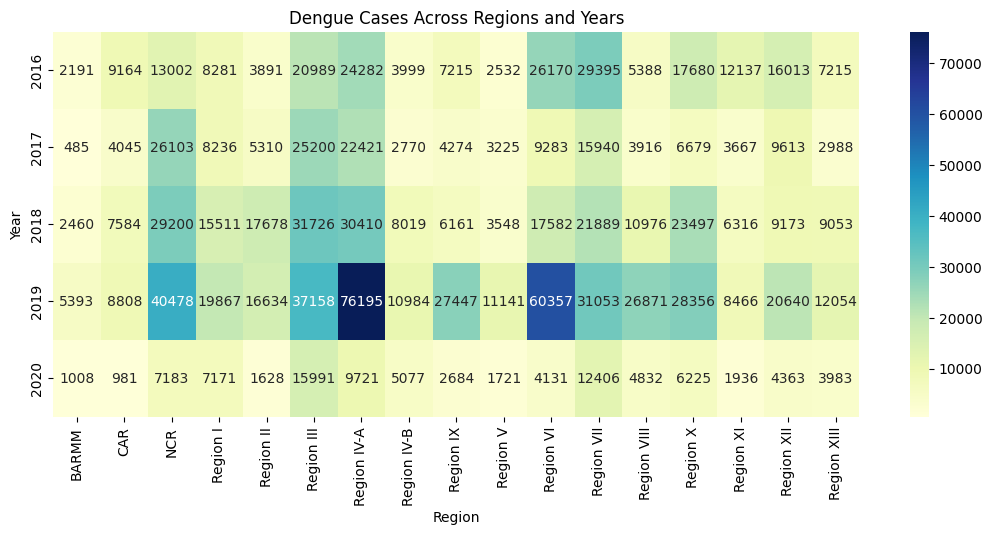

In [15]:
heatmap_data = dengue.pivot_table(index="Year", columns="Region", values="Dengue_Cases", aggfunc="sum")
print(heatmap_data)

plt.figure(figsize=(13, 5))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Dengue Cases Across Regions and Years")
plt.show()

<h1> Insight: Some regions consistently have high dengue cases every year.</h1>

<h1>Task 9 -  Dengue mortality rate by year and region</h1>

Region      BARMM        CAR        NCR  Region I  Region II  Region III  \
Year                                                                       
2016    19.656466  18.854203  21.972801  0.286371   0.300399    0.243058   
2017     0.393768   0.240832   0.630968  0.364814   0.623934    0.353272   
2018     1.469210   0.122160   0.570298  0.343713   0.360413    0.255475   
2019     0.665417   0.282520   0.483295  0.246611   0.431969    0.367087   
2020    10.682807  15.367024  23.406175  0.698408   0.439139    0.423553   

Region  Region IV-A  Region IV-B  Region IX  Region V  Region VI  Region VII  \
Year                                                                           
2016       0.414637     0.528645   0.580125  0.553875   0.321211    0.834078   
2017       0.436508     0.474313  22.403233  0.740861  20.065515   13.941051   
2018       0.540263     0.609668   0.793398  1.008180   0.680332    0.651166   
2019       0.409786     0.273085   0.498999  1.061799   0.459870   

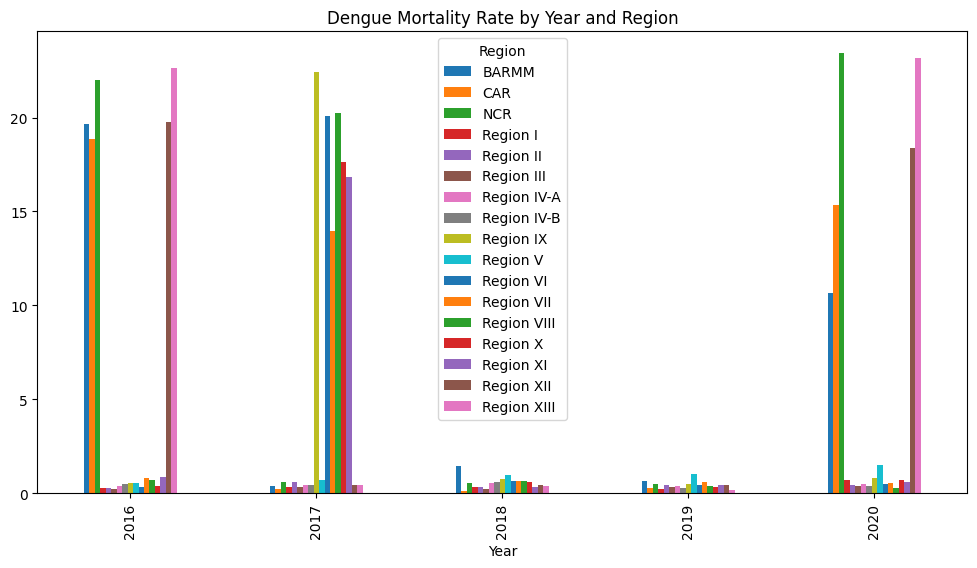

In [16]:
dengue["Mortality_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"] * 100
mortality_data = dengue.groupby(["Year", "Region"])["Mortality_Rate"].mean().unstack()
print(mortality_data)

mortality_data.plot(kind='bar', figsize=(12,6), title="Dengue Mortality Rate by Year and Region")
plt.show()

<h1>Insight: Some regions have much higher mortality rates, showing disparities in healthcare.
</h1>

<h1>Task 10 - Seasonal pattern of dengue cases across regions</h1>

Region     BARMM     CAR     NCR  Region I  Region II  Region III  \
Month                                                               
April      102.6   122.4   548.6     193.6      187.0       516.8   
August     304.6  1178.6  3161.6    2336.2     1329.0      4217.4   
December   140.4   325.4  2013.6     908.4      747.2      2308.8   
February   164.4   302.4  1692.8     419.8      671.8      1954.4   
January    152.4   352.8  1878.0     541.8      692.6      2289.2   
July       367.4  1184.8  1826.8    1748.0      904.2      2493.2   
June       235.2   516.0   627.8     471.4      432.0       788.8   
March      143.8   191.8  1045.8     282.6      409.4      1152.0   
May        132.4   193.4   413.4     208.0      206.8       423.8   
November   144.0   399.0  2462.4    1210.0      899.8      2422.0   
October    172.0   573.8  3248.6    1326.4     1112.6      3192.6   
September  248.2   776.0  4273.8    2167.0     1435.8      4453.8   

Region     Region IV-A  Region IV

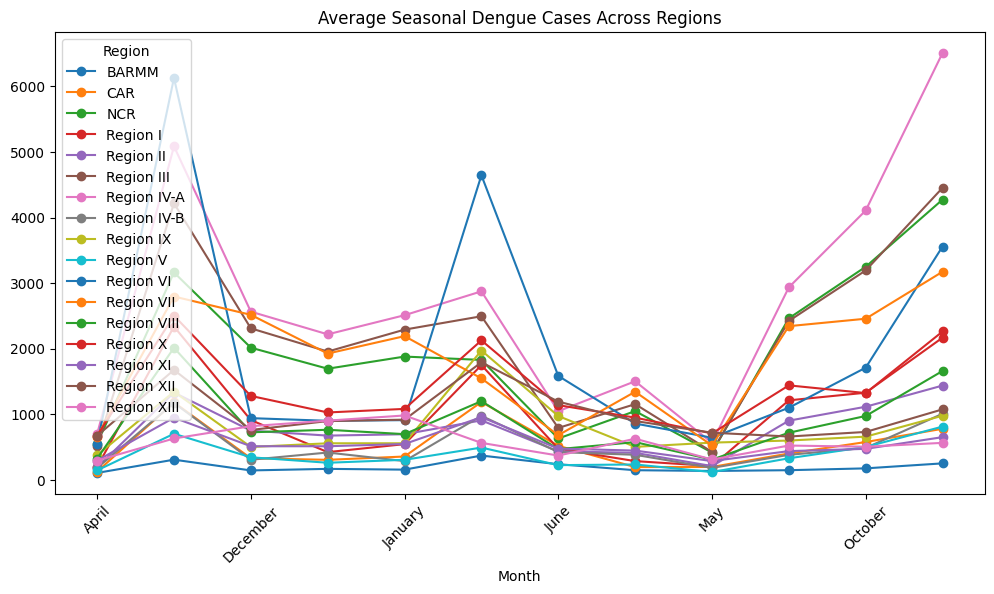

In [17]:
avg_seasonal_cases = dengue.groupby(["Month", "Region"])["Dengue_Cases"].mean().unstack()
print(avg_seasonal_cases)
avg_seasonal_cases.plot(kind='line', marker='o', figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Average Seasonal Dengue Cases Across Regions")
plt.show()


<h1> Insight: Seasonal spikes in cases appear in multiple regions, confirming seasonal trends.</h1>

<h1>Task 11 - Monthly average mortality rate</h1>

Month
April         0.710867
August        0.510762
December      0.478902
February      0.495254
January       0.491642
July          0.468862
June          0.570287
March         0.549050
May           0.472023
November      2.005829
October      25.198955
September    16.203042
Name: Mortality_Rate, dtype: float64


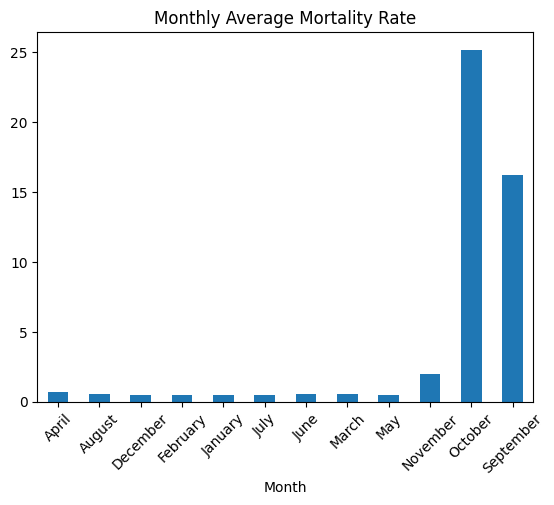

In [18]:
monthly_mortality = dengue.groupby("Month")["Mortality_Rate"].mean()
print(monthly_mortality)

monthly_mortality.plot(kind='bar', title="Monthly Average Mortality Rate")
plt.xticks(rotation=45)
plt.show()

<h1>Insight - October shows a highest average mortality rate</h1>

<h1>Task 12 - Regions with the highest dengue cases</h1>

Region
Region IV-A    163029
Region III     131064
Region VI      117523
NCR            115966
Region VII     110683
Name: Dengue_Cases, dtype: int64


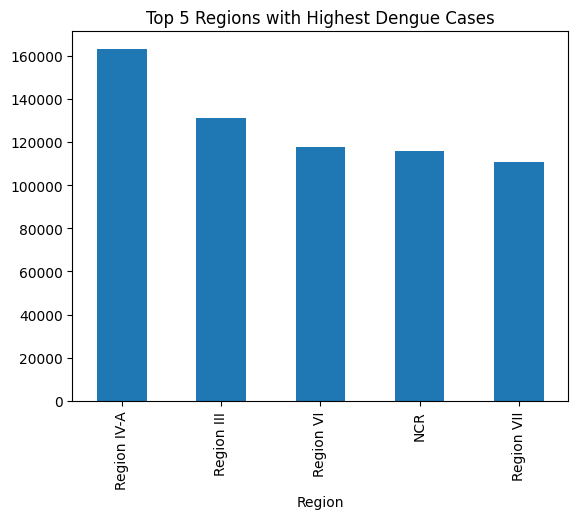

In [19]:
top_regions = dengue.groupby("Region")["Dengue_Cases"].sum().nlargest(5)
print(top_regions)
top_regions.plot(kind='bar', title="Top 5 Regions with Highest Dengue Cases")
plt.show()

<h1>Insight: Some years had a major spike in dengue deaths, signaling severe outbreaks.</h1>

<h1>Task 13 - Yearly variation in dengue cases</h1>

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


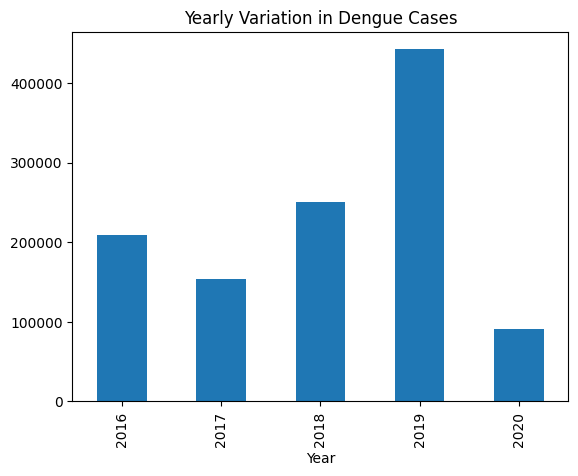

In [28]:
yearly_cases = dengue.groupby("Year")["Dengue_Cases"].sum()
print(yearly_cases)

yearly_cases.plot(kind='bar', title="Yearly Variation in Dengue Cases")
plt.show()

<h1>Insight: Some years experienced major outbreaks, while others had fewer cases.</h1>

<h1>Task 14 -  Monthly dengue cases trend per year</h1>

Month  April  August  December  February  January   July   June  March    May  \
Year                                                                            
2016    7269   36195     13490     12386    17052  29744  10831   9300   8092   
2017    6343   25039     13235      9872    15623  18340   7589   7696   4853   
2018    6860   34210     31353     10466    12657  30363  11502   7944   6594   
2019    9252   85038     24397     25494    20672  55220  25523  19798  10387   
2020    2784    7072      5956     19583    18324   4575   2665  12838   2461   

Month  November  October  September  
Year                                 
2016      16252    21943      26990  
2017      12553    15259      17753  
2018      30191    30026      38617  
2019      30097    46382      89642  
2020       5807     4035       4941  


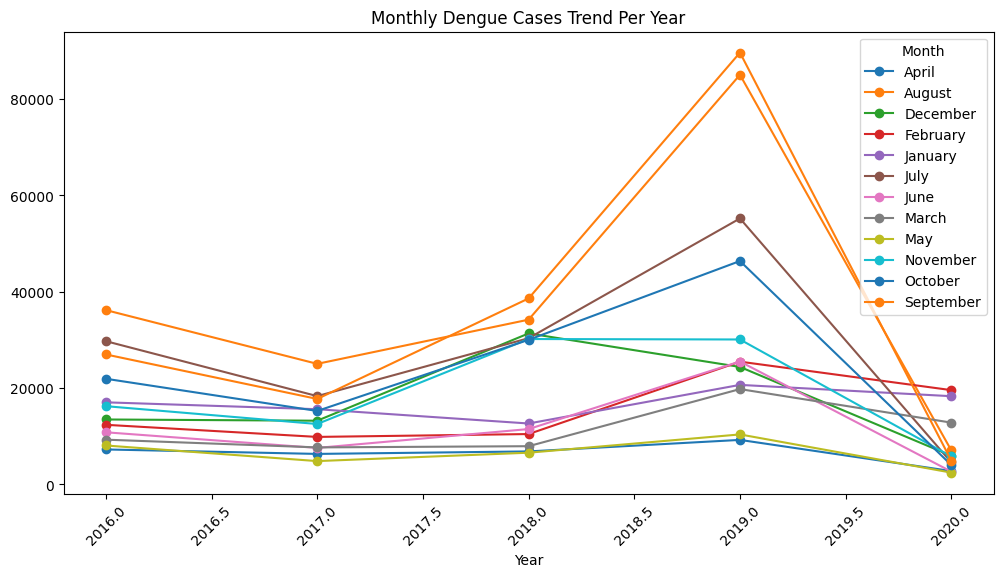

In [30]:
# 14. Monthly dengue cases trend per year
trend_data = dengue.groupby(["Year", "Month"])["Dengue_Cases"].sum().unstack()
print(trend_data)

trend_data.plot(kind='line', marker='o', figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Monthly Dengue Cases Trend Per Year")
plt.show()

<h1>Insight: Recurring peaks suggest seasonal patterns affecting yearly outbreaks.
</h1>

<h1>Task 15 -  Correlation heatmap of all numerical variables</h1>

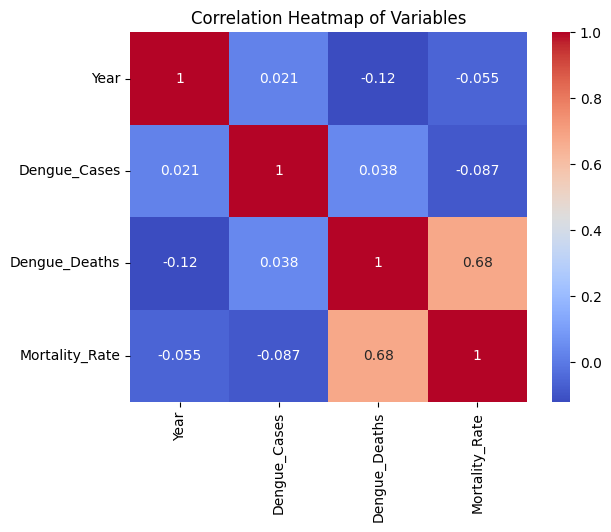

In [33]:
numeric_dengue = dengue.select_dtypes(include=[np.number])  
sns.heatmap(numeric_dengue.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Variables")
plt.show()

<h1>Insight: Strong correlation between dengue cases and deaths confirms that more cases often lead to higher fatalities.</h1>

<h1>Task 16 - Top 3 years with the most dengue cases</h1>

Year
2019    441902
2018    250783
2016    209544
Name: Dengue_Cases, dtype: int64


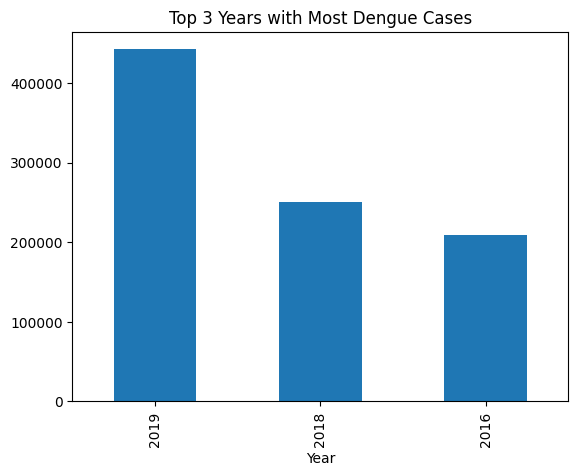

In [35]:
top_years = dengue.groupby("Year")["Dengue_Cases"].sum().nlargest(3)
print(top_years)
top_years.plot(kind='bar', title="Top 3 Years with Most Dengue Cases")
plt.show()

<h1>Insight: The highest number of cases occurred in specific years, highlighting major outbreak periods.</h1>

<h1>Task 17 -  Monthly variation of dengue mortality rate</h1>

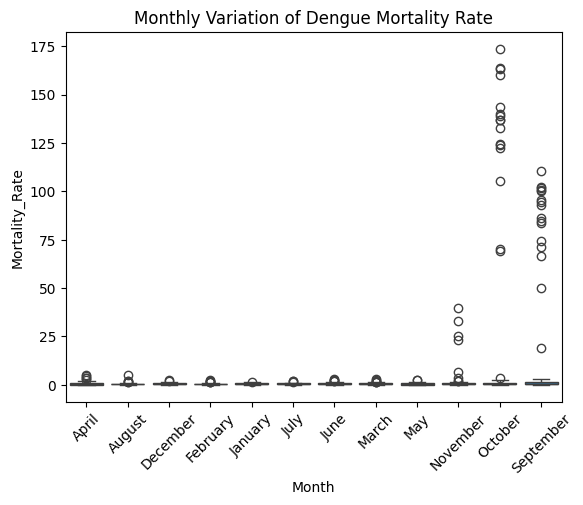

In [36]:
sns.boxplot(x=dengue["Month"], y=dengue["Mortality_Rate"])
plt.title("Monthly Variation of Dengue Mortality Rate")
plt.xticks(rotation=45)
plt.show()

<h1>Insight: Certain months have higher mortality rates, possibly due to delays in medical response.</h1>

<h1>Task 18 -  Dengue cases per region per year</h1>

Region  BARMM   CAR    NCR  Region I  Region II  Region III  Region IV-A  \
Year                                                                       
2016     2191  9164  13002      8281       3891       20989        24282   
2017      485  4045  26103      8236       5310       25200        22421   
2018     2460  7584  29200     15511      17678       31726        30410   
2019     5393  8808  40478     19867      16634       37158        76195   
2020     1008   981   7183      7171       1628       15991         9721   

Region  Region IV-B  Region IX  Region V  Region VI  Region VII  Region VIII  \
Year                                                                           
2016           3999       7215      2532      26170       29395         5388   
2017           2770       4274      3225       9283       15940         3916   
2018           8019       6161      3548      17582       21889        10976   
2019          10984      27447     11141      60357       31053    

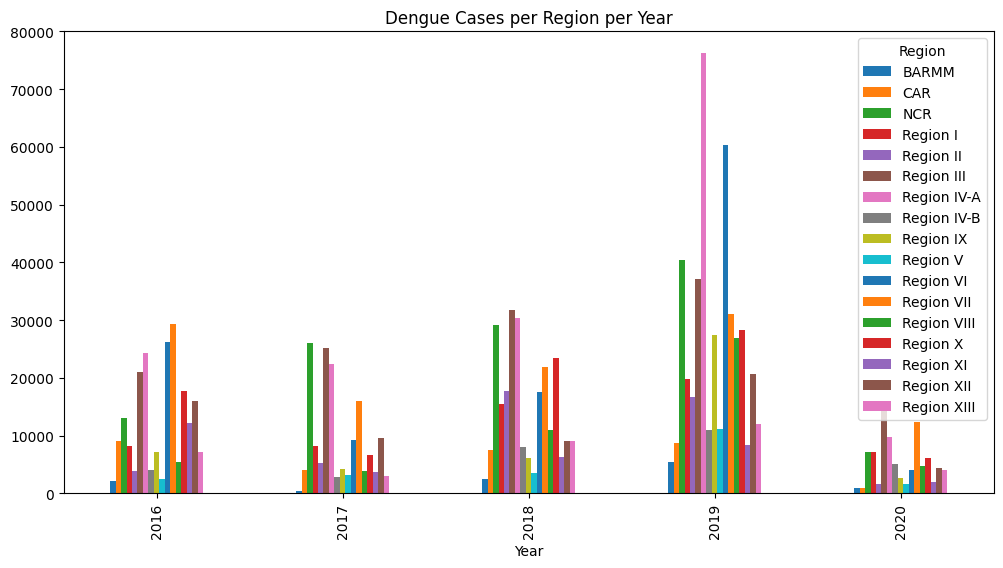

In [38]:
cases_per_region = dengue.groupby(["Year", "Region"])["Dengue_Cases"].sum().unstack()
print(cases_per_region)
cases_per_region.plot(kind='bar', figsize=(12,6), title="Dengue Cases per Region per Year")
plt.show()


<h1>Insight: Some regions consistently report higher cases yearly, indicating persistent outbreaks.</h1>

<h1>Task 19 -  Regions with highest dengue deaths</h1>

Region
NCR           4008
Region XII    2796
Region VI     1825
Region VII    1760
CAR           1008
Name: Dengue_Deaths, dtype: int64


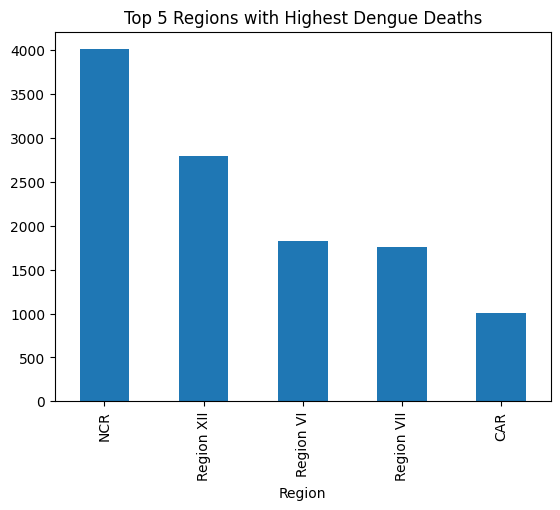

In [39]:
top_death_regions = dengue.groupby("Region")["Dengue_Deaths"].sum().nlargest(5)
print(top_death_regions)
top_death_regions.plot(kind='bar', title="Top 5 Regions with Highest Dengue Deaths")
plt.show()

<h1>Insight: The top region has the most dengue deaths, emphasizing the need for better healthcare.</h1>

<h1>Task 20 - Monthly average dengue deaths</h1>

Month
April         2.352941
August        8.400000
December      4.752941
February      3.705882
January       4.635294
July          7.188235
June          3.788235
March         3.423529
May           1.905882
November      7.211765
October      78.470588
September    72.329412
Name: Dengue_Deaths, dtype: float64


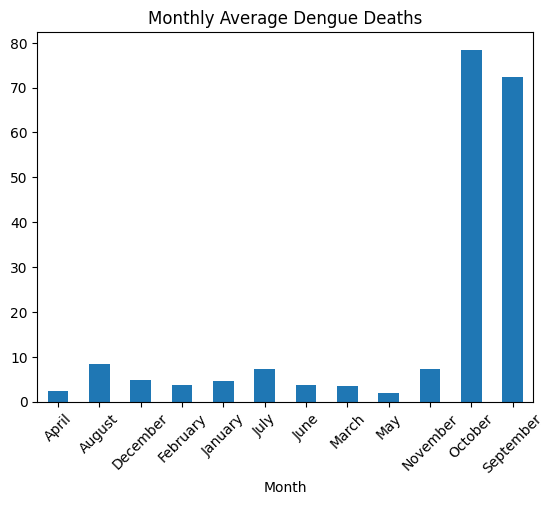

In [41]:
monthly_avg_deaths = dengue.groupby("Month")["Dengue_Deaths"].mean()
print(monthly_avg_deaths)
monthly_avg_deaths.plot(kind='bar', title="Monthly Average Dengue Deaths")
plt.xticks(rotation=45)
plt.show()

<h1>Insight: The month with the highest average deaths suggests a recurring deadly season.</h1>